
🔹 Running Classification Experiment...

📘 Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        88
           1       0.74      0.66      0.70        97
           2       0.69      0.71      0.70       115

    accuracy                           0.69       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.69      0.69      0.69       300


📘 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.88      0.78        88
           1       0.79      0.73      0.76        97
           2       0.80      0.70      0.75       115

    accuracy                           0.76       300
   macro avg       0.77      0.77      0.76       300
weighted avg       0.77      0.76      0.76       300



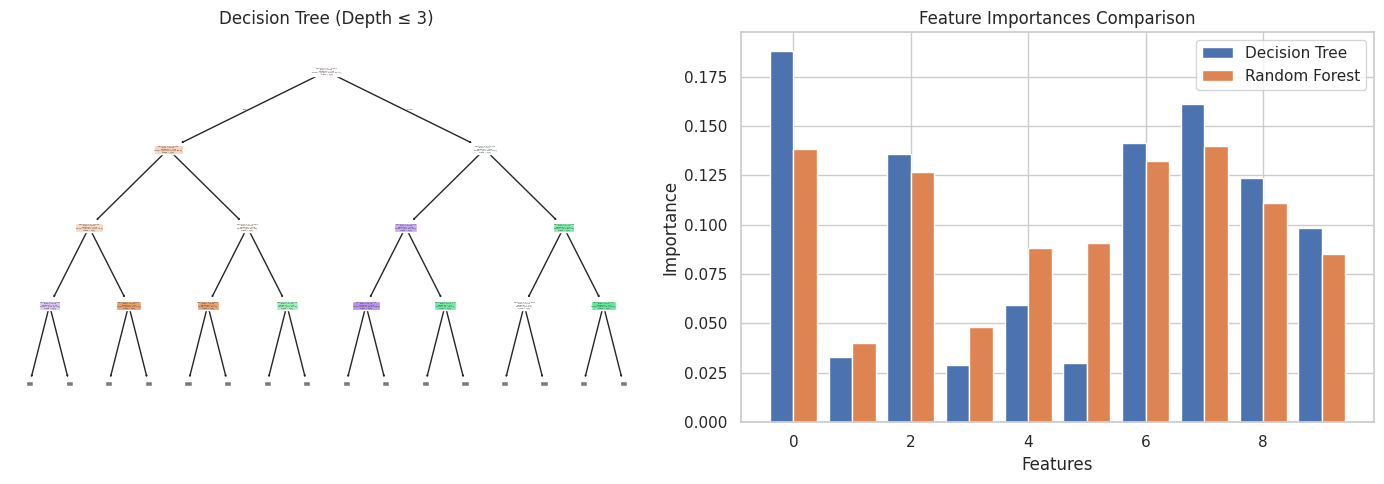


Classification Metrics Summary:
                Accuracy  Precision    Recall  F1-score
Decision Tree  0.690000   0.692355  0.690000  0.690219
Random Forest  0.763333   0.769717  0.763333  0.762332

🔹 Running Regression Experiment...

📘 Decision Tree Regression Metrics:
Mean Squared Error: 5624.824
R² Score: 0.725

📘 Random Forest Regression Metrics:
Mean Squared Error: 2184.103
R² Score: 0.893


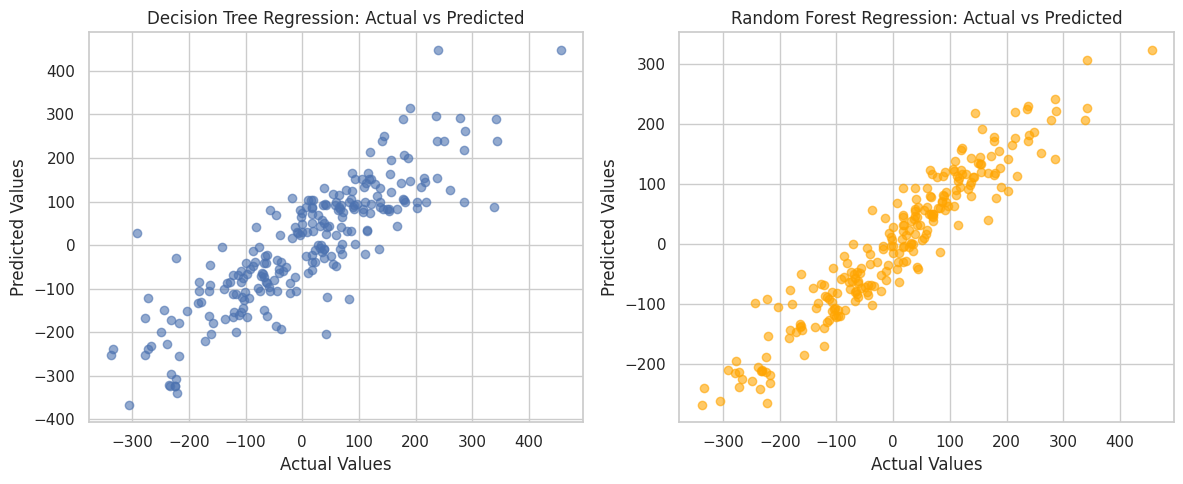


Regression Metrics Summary:
                        MSE        R²
Decision Tree  5624.824022  0.724806
Random Forest  2184.103458  0.893143


In [ ]:
# ============================================================
# LAB: Decision Tree & Random Forest for Classification & Regression
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, classification_report, precision_score, recall_score, f1_score,
    mean_squared_error, r2_score
)

# ------------------------------------------------------------
# Helper function: Run classification experiment
# ------------------------------------------------------------
def run_classification_experiment(X, y, feature_names=None):
    print("\n🔹 Running Classification Experiment...")

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize models
    dt = DecisionTreeClassifier(random_state=0)
    rf = RandomForestClassifier(n_estimators=100, random_state=0)

    # Train
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Predictions
    y_pred_dt = dt.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    # Evaluation (multi-class compatible)
    metrics = {}
    for name, model, y_pred in [('Decision Tree', dt, y_pred_dt), ('Random Forest', rf, y_pred_rf)]:
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average='weighted')
        rec = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        metrics[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-score': f1}

        print(f"\n📘 {name} Classification Report:")
        print(classification_report(y_test, y_pred))

    # Visualization
    plt.figure(figsize=(14, 5))

    # Decision Tree visualization
    plt.subplot(1, 2, 1)
    plot_tree(dt, filled=True, feature_names=feature_names, class_names=True, max_depth=3)
    plt.title("Decision Tree (Depth ≤ 3)")

    # Feature importance comparison
    plt.subplot(1, 2, 2)
    dt_importances = dt.feature_importances_
    rf_importances = rf.feature_importances_
    indices = np.arange(len(dt_importances))

    plt.bar(indices - 0.2, dt_importances, 0.4, label="Decision Tree")
    plt.bar(indices + 0.2, rf_importances, 0.4, label="Random Forest")
    plt.title("Feature Importances Comparison")
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return metrics


# ------------------------------------------------------------
# Helper function: Run regression experiment
# ------------------------------------------------------------
def run_regression_experiment(X, y, feature_names=None):
    print("\n🔹 Running Regression Experiment...")

    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize models
    dt = DecisionTreeRegressor(random_state=0)
    rf = RandomForestRegressor(n_estimators=100, random_state=0)

    # Train
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Predictions
    y_pred_dt = dt.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    # Evaluation
    metrics = {}
    for name, y_pred in [('Decision Tree', y_pred_dt), ('Random Forest', y_pred_rf)]:
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        metrics[name] = {'MSE': mse, 'R²': r2}

        print(f"\n📘 {name} Regression Metrics:")
        print(f"Mean Squared Error: {mse:.3f}")
        print(f"R² Score: {r2:.3f}")

    # Visualization: Actual vs Predicted
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_dt, alpha=0.6)
    plt.title("Decision Tree Regression: Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_rf, alpha=0.6, color='orange')
    plt.title("Random Forest Regression: Actual vs Predicted")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")

    plt.tight_layout()
    plt.show()

    return metrics


# ------------------------------------------------------------
# 1️⃣ Classification Demo
# ------------------------------------------------------------
Xc, yc = make_classification(
    n_samples=1000, n_features=10, n_informative=6,
    n_redundant=2, n_classes=3, random_state=42
)
feature_names_c = [f"Feature_{i}" for i in range(Xc.shape[1])]
cls_metrics = run_classification_experiment(Xc, yc, feature_names_c)
print("\nClassification Metrics Summary:\n", pd.DataFrame(cls_metrics).T)

# ------------------------------------------------------------
# 2️⃣ Regression Demo
# ------------------------------------------------------------
Xr, yr = make_regression(
    n_samples=800, n_features=8, noise=0.4, random_state=42
)
feature_names_r = [f"Feature_{i}" for i in range(Xr.shape[1])]
reg_metrics = run_regression_experiment(Xr, yr, feature_names_r)
print("\nRegression Metrics Summary:\n", pd.DataFrame(reg_metrics).T)
